In [963]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

### Data

In [964]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_updated.csv')
poi_df = pd.read_csv('poi.csv', low_memory=False)

In [965]:
train_df.shape

(46312, 17)

In [966]:
test_df.shape

(19788, 16)

## Data Exploration

In [967]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46312 entries, 0 to 46311
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   46312 non-null  int64  
 1   price                46312 non-null  int64  
 2   balcony              30869 non-null  object 
 3   conditions           45083 non-null  object 
 4   construction_year    32366 non-null  float64
 5   latitude             46299 non-null  float64
 6   longitude            46299 non-null  float64
 7   energy_efficiency    26409 non-null  float64
 8   expenses             30158 non-null  float64
 9   floor                44281 non-null  float64
 10  garden               14783 non-null  object 
 11  n_bathrooms          43896 non-null  float64
 12  elevator             28869 non-null  float64
 13  total_floors         27963 non-null  float64
 14  n_rooms              45959 non-null  float64
 15  proximity_to_center  46299 non-null 

In [968]:
train_df.head()

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0


In [969]:
train_df[train_df.price > 4e7]

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
15582,31222,45000000,NaN,Ottimo / Ristrutturato,NaN,41.882561,12.470400,NaN,NaN,0.0,NaN,NaN,NaN,1.0,5.0,1.0,10.0
20384,51786,72000000,True,Ottimo / Ristrutturato,1900.0,41.890301,12.493500,175.0,NaN,5.0,NaN,NaN,NaN,1.0,5.0,1.0,0.0
29702,33733,50000000,NaN,Nuovo / Nuova costruzione,NaN,45.434280,12.338111,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
29952,43580,62000000,NaN,NaN,NaN,45.433701,12.338300,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,1.0,200.0


In [970]:
train_df[train_df.price < 1000]

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
4488,39430,154,True,Nuovo / Nuova costruzione,2019.0,41.853586,12.652271,NaN,NaN,NaN,True,2.0,NaN,NaN,5.0,1.0,119.0
15605,46741,650,NaN,Buono stato / Abitabile,NaN,45.476200,12.197400,NaN,0.0,3.0,NaN,1.0,NaN,3.0,4.0,1.0,80.0


In [971]:
id_col = test_df['id']

In [972]:
train_df.drop('id', axis=1, inplace=True)

In [973]:
test_df.drop('id', axis=1, inplace=True)

### Scatterplots to Check Outliers

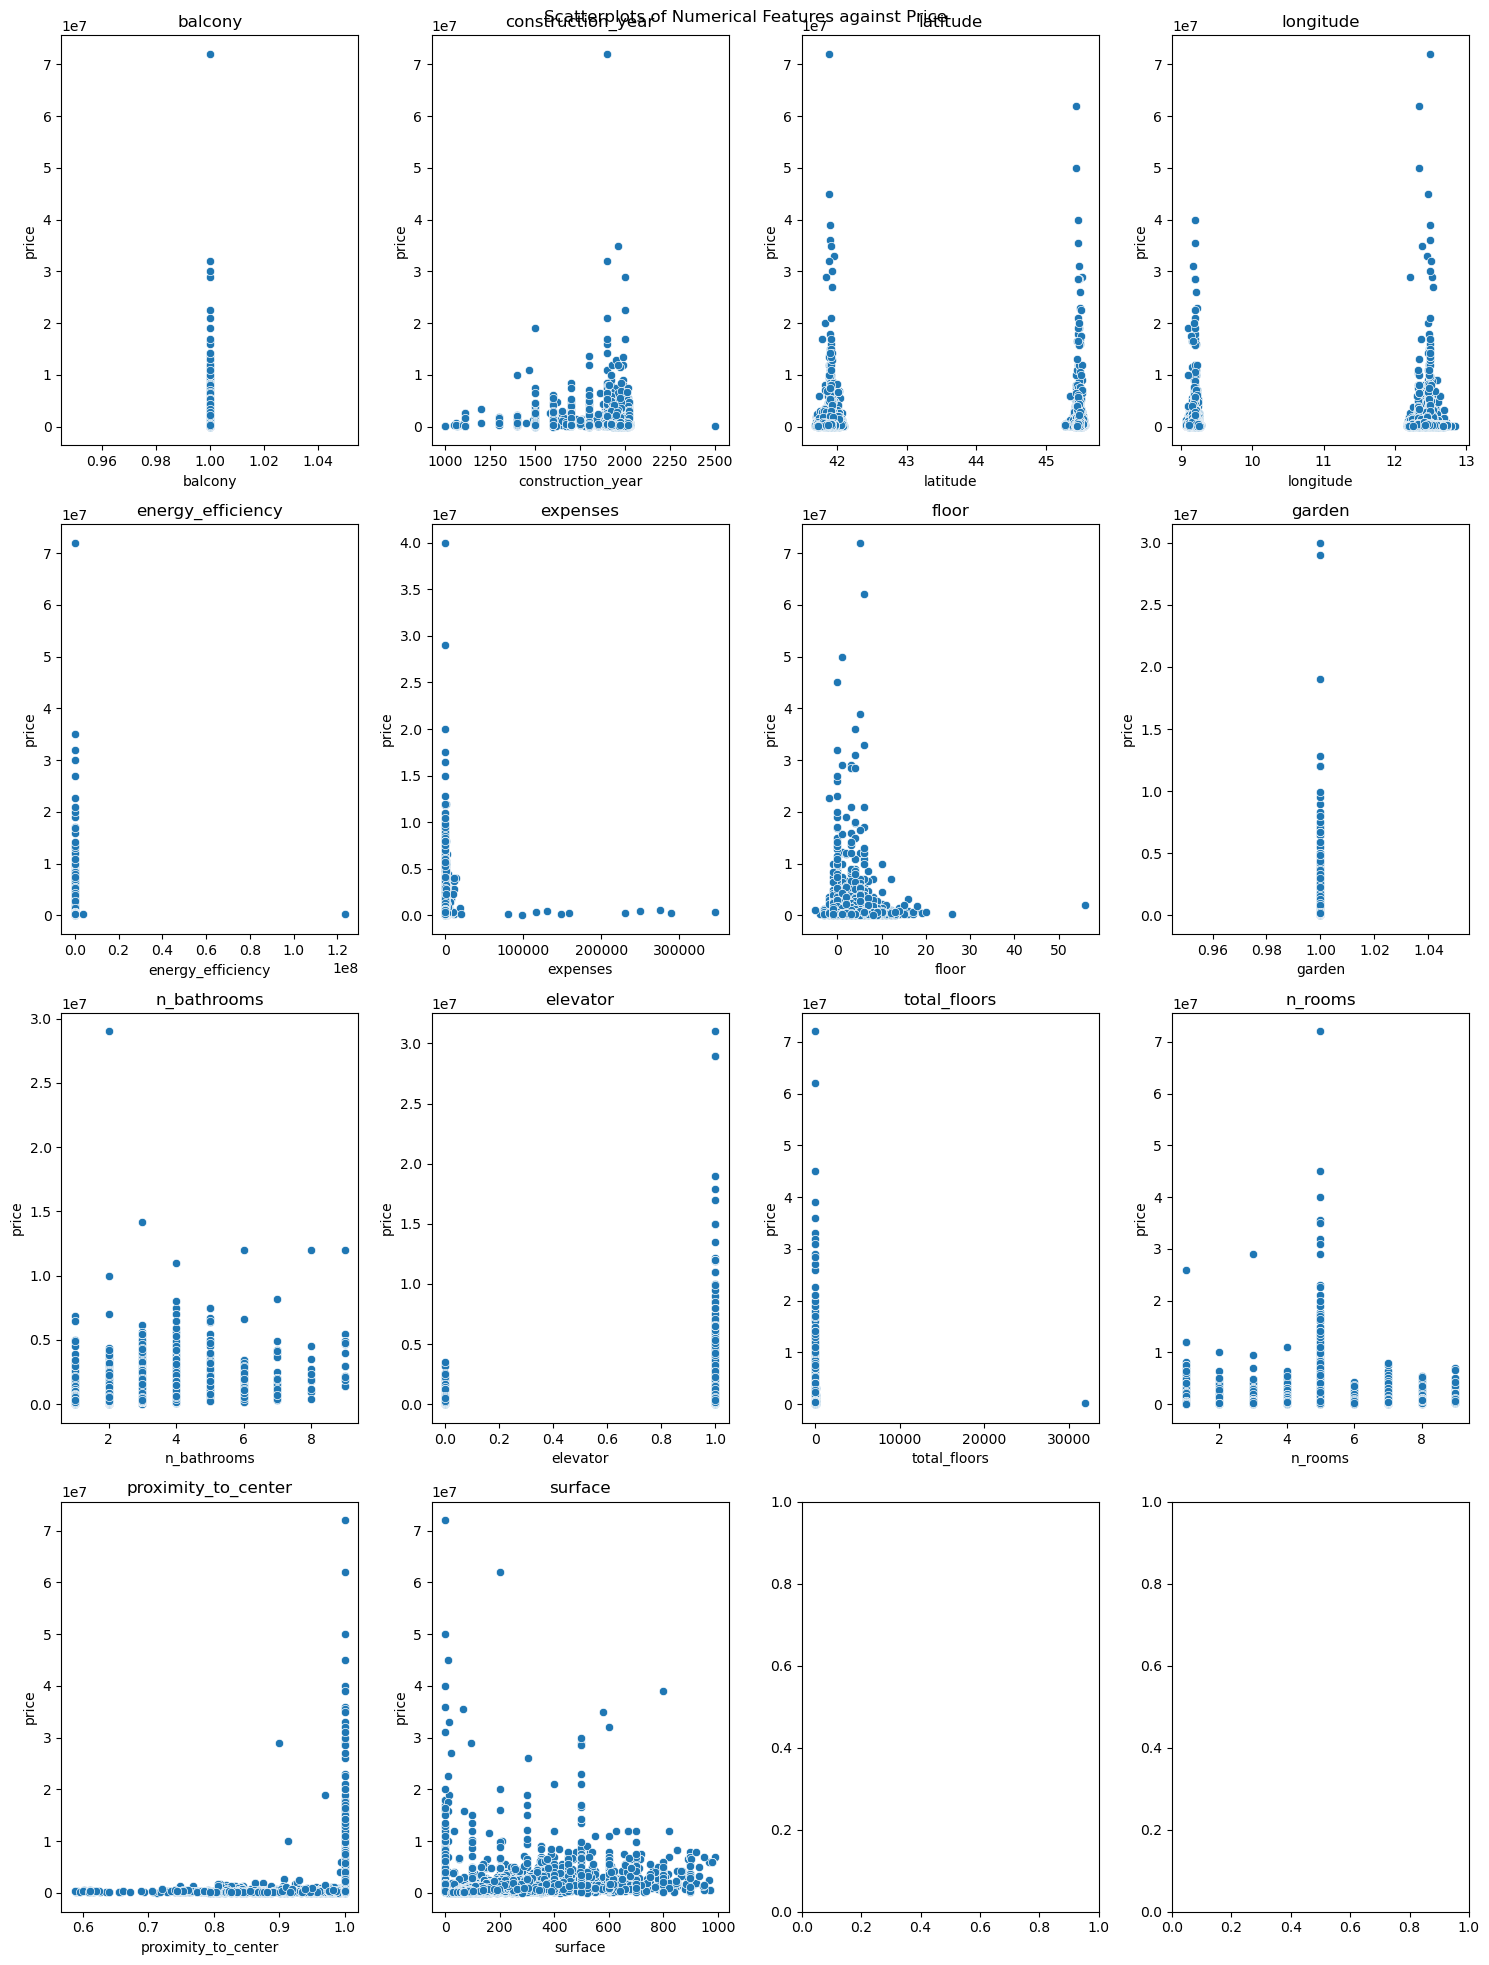

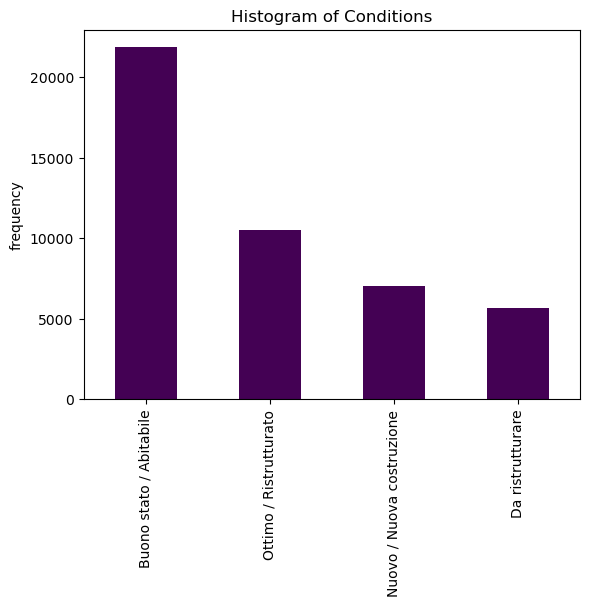

In [974]:
cols = train_df.columns.tolist()
cols.remove('price')
cols.remove('conditions')

num_cols = 4
num_rows = -(-len(cols) // num_cols)  # ceil division

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for col, ax in zip(cols, axes.flat):
    sns.scatterplot(data=train_df, x=col, y='price', ax=ax)
    ax.set_title(col)

fig.suptitle('Scatterplots of Numerical Features against Price')
fig.tight_layout()
plt.show()

train_df['conditions'].value_counts().plot(kind='bar', xlabel='', ylabel='frequency', cmap='viridis')
plt.title('Histogram of Conditions')
plt.show()

#### Heatmap

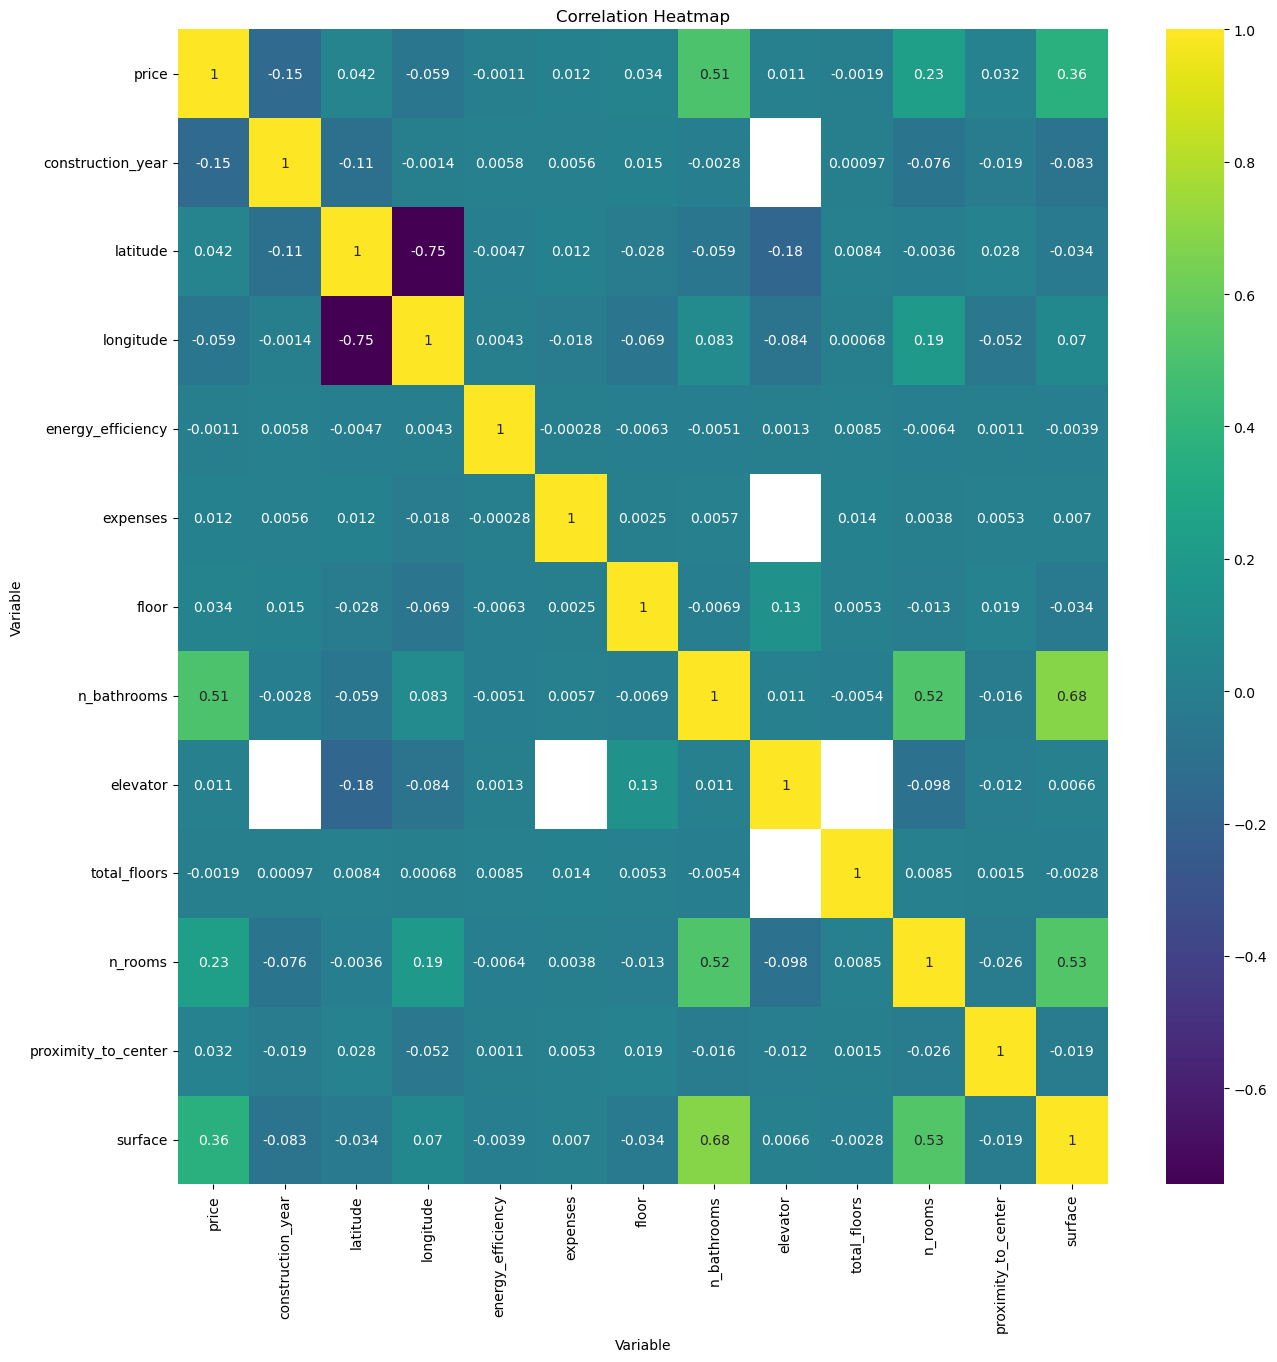

In [975]:
figure, axis = plt.subplots(figsize=(15, 15))

cmap = 'viridis'

sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap=cmap, ax=axis)

axis.set_title('Correlation Heatmap')
axis.set_xlabel('Variable')
axis.set_ylabel('Variable')

plt.show()

#### Other Visualizations to spot outliers

Text(0, 0.5, 'N* Bathrooms')

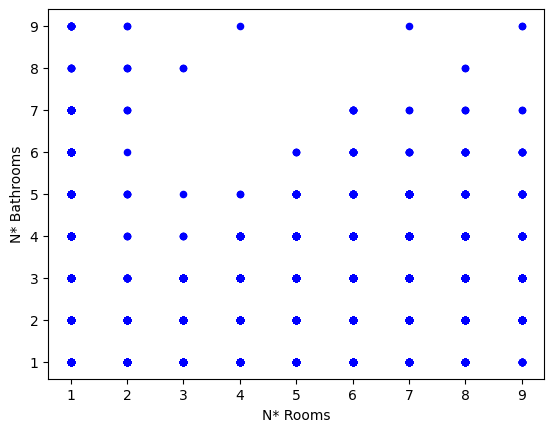

In [976]:
train_df.plot.scatter(x='n_rooms', y='n_bathrooms', c='blue')
plt.xlabel('N* Rooms')
plt.ylabel('N* Bathrooms')

#### Plot of the coordinates to identify clusters

Text(0, 0.5, 'Latitude')

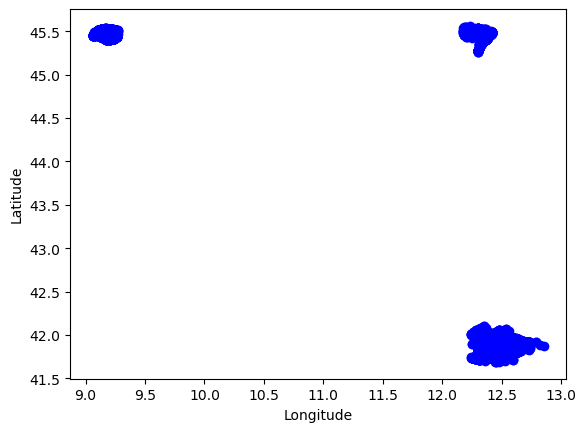

In [977]:
plt.scatter(x=train_df['longitude'], y=train_df['latitude'], c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

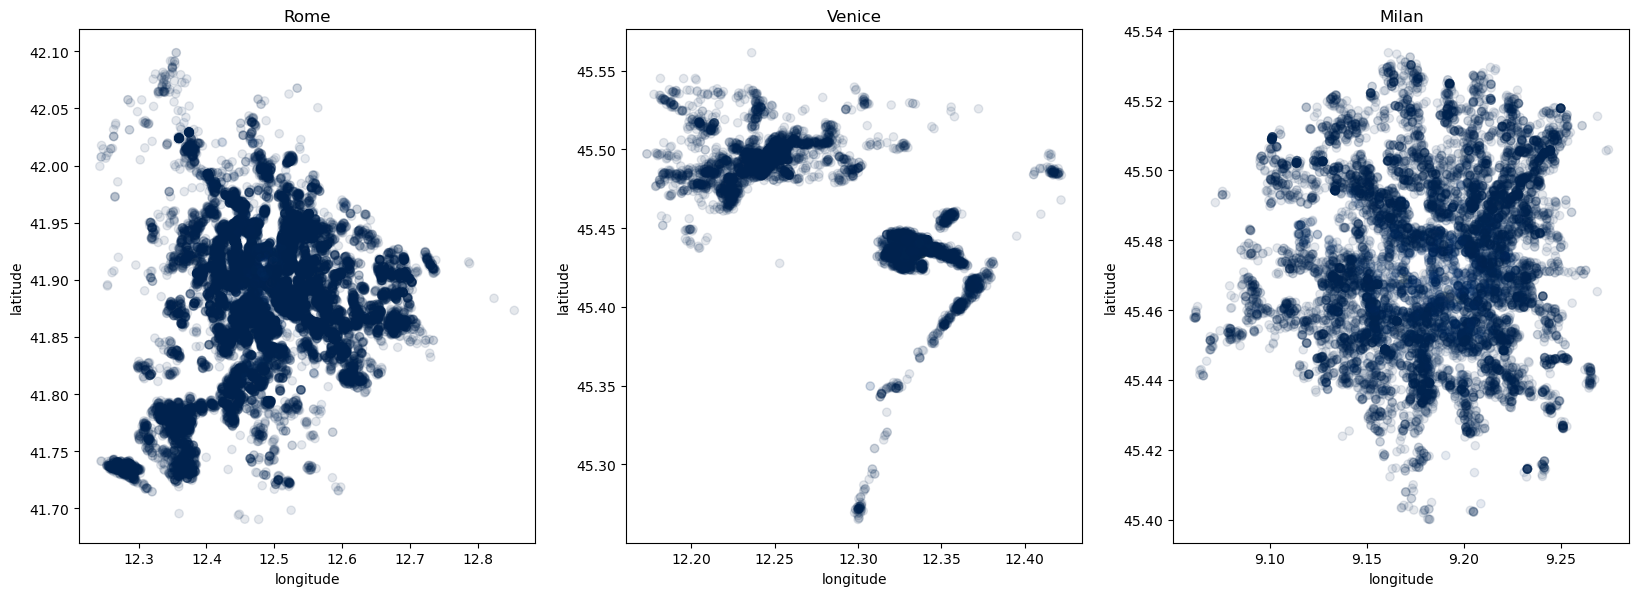

In [978]:
train_fullcoord = train_df.dropna(subset=['longitude', 'latitude'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/3))

rome = train_fullcoord[train_fullcoord.latitude < 43]
axes[0].scatter(x=rome.longitude, y=rome.latitude, c=rome.price, cmap='cividis', alpha=0.1)
axes[0].set_title("Rome")
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")

venice = train_fullcoord[(train_fullcoord.latitude > 43) & (train_fullcoord.longitude > 11)]
axes[1].scatter(x=venice.longitude, y=venice.latitude, c=venice.price, cmap='cividis', alpha=0.1)
axes[1].set_title("Venice")
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")

milan = train_fullcoord[(train_fullcoord.latitude > 43) & (train_fullcoord.longitude < 11)]
axes[2].scatter(x=milan.longitude, y=milan.latitude, c=milan.price, cmap='cividis', alpha=0.1)
axes[2].set_title("Milan")
axes[2].set_xlabel("longitude")
axes[2].set_ylabel("latitude")

plt.show()

In [979]:
train_df[train_df.surface == 0]

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
237,1830000,True,Nuovo / Nuova costruzione,1970.0,41.994703,12.455172,NaN,NaN,NaN,True,8.0,NaN,NaN,2.0,1.0,0.0
385,1600000,True,Buono stato / Abitabile,1950.0,42.023894,12.359742,NaN,NaN,NaN,True,4.0,NaN,NaN,1.0,1.0,0.0
569,5900000,True,Buono stato / Abitabile,NaN,45.498300,9.201700,159.62,0.0,0.0,True,NaN,1.0,5.0,5.0,1.0,0.0
1528,8200000,NaN,Ottimo / Ristrutturato,NaN,41.904301,12.487744,175.00,NaN,4.0,NaN,NaN,NaN,4.0,5.0,1.0,0.0
2106,2800000,NaN,Buono stato / Abitabile,NaN,41.786500,12.567900,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44360,6100000,NaN,Da ristrutturare,NaN,45.452900,9.223680,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,0.0
45069,13500000,NaN,Da ristrutturare,1990.0,41.916908,12.498440,1.00,NaN,0.0,NaN,NaN,NaN,1.0,5.0,1.0,0.0
45198,11000000,True,Buono stato / Abitabile,NaN,41.918598,12.478500,1.00,NaN,0.0,NaN,NaN,NaN,5.0,5.0,1.0,0.0
45820,295000,NaN,Buono stato / Abitabile,NaN,41.886760,12.676639,NaN,NaN,2.0,True,3.0,NaN,NaN,4.0,1.0,0.0


In [980]:
train_df[train_df.construction_year > 2025]

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
30496,145000,NaN,Buono stato / Abitabile,2500.0,45.497383,12.253994,NaN,200.0,1.0,NaN,1.0,NaN,NaN,6.0,1.0,98.0


In [981]:
train_df[train_df.energy_efficiency > 999999]

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
8236,310000,True,Ottimo / Ristrutturato,2016.0,41.901299,12.54673,123457000.0,35.0,0.0,True,1.0,1.0,8.0,2.0,1.0,60.0
43977,189000,True,Ottimo / Ristrutturato,1970.0,41.807919,12.43454,3727500.0,120.0,5.0,NaN,1.0,1.0,5.0,2.0,1.0,60.0


In [982]:
train_df[train_df.total_floors > 45]

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
8619,249000,True,Ottimo / Ristrutturato,NaN,41.862389,12.710558,80.0,0.0,2.0,True,1.0,1.0,100.0,4.0,1.000000,110.0
15301,680000,True,Buono stato / Abitabile,1980.0,41.852300,12.563600,NaN,NaN,1.0,NaN,3.0,NaN,56.0,4.0,1.000000,215.0
22504,169000,True,Buono stato / Abitabile,1960.0,45.500700,12.247500,NaN,NaN,2.0,NaN,1.0,NaN,31960.0,5.0,1.000000,90.0
24665,180000,NaN,Ottimo / Ristrutturato,2010.0,41.750671,12.317970,312.0,20.0,7.0,True,1.0,NaN,70.0,2.0,0.967708,70.0
28047,370000,True,Buono stato / Abitabile,2000.0,41.994347,12.385251,212.0,100.0,1.0,True,2.0,NaN,135.0,5.0,1.000000,135.0
35787,173000,True,Ottimo / Ristrutturato,2011.0,41.900089,12.687400,165500.0,61.0,1.0,NaN,2.0,NaN,109.0,3.0,1.000000,115.0
36687,502000,True,Buono stato / Abitabile,NaN,41.947900,12.447200,129.4,NaN,2.0,NaN,2.0,NaN,99.0,3.0,1.000000,NaN
37018,129000,True,Buono stato / Abitabile,1972.0,45.483990,12.213790,206.0,500.0,3.0,True,1.0,NaN,70.0,3.0,1.000000,70.0


In [983]:
c = train_df.isnull().sum().sort_values(ascending= True)
p = (train_df.isnull().mean().sort_values(ascending=True))

missing = pd.concat([c, p], axis=1, keys=['Count', 'Percentage'])
missing

,Count,Percentage
price,0,0.000000
latitude,13,0.000281
longitude,13,0.000281
proximity_to_center,13,0.000281
n_rooms,353,0.007622
surface,443,0.009566
conditions,1229,0.026537
floor,2031,0.043855
n_bathrooms,2416,0.052168
construction_year,13946,0.301131


In [984]:
c_test = test_df.isnull().sum().sort_values(ascending= True)
p_test = (test_df.isnull().mean().sort_values(ascending=True))

missing_test = pd.concat([c_test, p_test], axis=1, keys=['Count', 'Percentage'])
missing_test

,Count,Percentage
latitude,10,0.000505
longitude,10,0.000505
proximity_to_center,10,0.000505
n_rooms,141,0.007126
surface,163,0.008237
conditions,511,0.025824
floor,876,0.044269
n_bathrooms,951,0.048059
construction_year,5964,0.301395
balcony,6732,0.340206


In [985]:
train2_df = train_df.drop(missing[missing['Percentage']> 0.68].index, axis=1)

In [986]:
test2_df = test_df.drop(missing[missing['Percentage']> 0.68].index, axis=1)

In [987]:
(train2_df.isna().sum()/len(train2_df)*100).sort_values(ascending = True)

price                   0.000000
latitude                0.028070
longitude               0.028070
proximity_to_center     0.028070
n_rooms                 0.762221
surface                 0.956556
conditions              2.653740
floor                   4.385472
n_bathrooms             5.216790
construction_year      30.113146
balcony                33.345569
expenses               34.880808
elevator               37.664104
total_floors           39.620401
energy_efficiency      42.975903
dtype: float64

In [988]:
train2_df['construction_year'] = train2_df['construction_year'].fillna(train2_df['construction_year'].mode()[0])
train2_df['balcony'] = train2_df['balcony'].fillna(train2_df['balcony'].mode()[0])
train2_df['expenses'] = train2_df['expenses'].fillna(train2_df['expenses'].mode()[0])
train2_df['floor'].fillna(train2_df['floor'].median(), inplace = True)
train2_df['energy_efficiency'].fillna(train2_df['energy_efficiency'].median(), inplace = True)
train2_df['latitude'].fillna(train2_df['latitude'].median(), inplace = True)
train2_df['longitude'].fillna(train2_df['longitude'].median(), inplace = True)
train2_df['n_bathrooms'].fillna(train2_df['n_bathrooms'].median(), inplace = True)
train2_df['elevator'].fillna(train2_df['elevator'].median(), inplace = True)
train2_df['n_rooms'].fillna(train2_df['n_rooms'].median(), inplace = True)
train2_df['proximity_to_center'].fillna(train2_df['proximity_to_center'].median(), inplace = True)
train2_df['surface'].fillna(train2_df['surface'].median(), inplace = True)
train2_df['total_floors'].fillna(train2_df['total_floors'].median(), inplace = True)

In [989]:
test2_df['construction_year'] = test2_df['construction_year'].fillna(test2_df['construction_year'].mode()[0])
test2_df['balcony'] = test2_df['balcony'].fillna(test2_df['balcony'].mode()[0])
test2_df['expenses'] = test2_df['expenses'].fillna(test2_df['expenses'].mode()[0])
test2_df['floor'].fillna(test2_df['floor'].median(), inplace = True)
test2_df['energy_efficiency'].fillna(test2_df['energy_efficiency'].median(), inplace = True)
test2_df['latitude'].fillna(test2_df['latitude'].median(), inplace = True)
test2_df['longitude'].fillna(test2_df['longitude'].median(), inplace = True)
test2_df['n_bathrooms'].fillna(test2_df['n_bathrooms'].median(), inplace = True)
test2_df['elevator'].fillna(test2_df['elevator'].median(), inplace = True)
test2_df['n_rooms'].fillna(test2_df['n_rooms'].median(), inplace = True)
test2_df['proximity_to_center'].fillna(test2_df['proximity_to_center'].median(), inplace = True)
test2_df['surface'].fillna(test2_df['surface'].median(), inplace = True)
test2_df['total_floors'].fillna(test2_df['total_floors'].median(), inplace = True)

In [990]:
train2_df.isna().sum()

price                     0
balcony                   0
conditions             1229
construction_year         0
latitude                  0
longitude                 0
energy_efficiency         0
expenses                  0
floor                     0
n_bathrooms               0
elevator                  0
total_floors              0
n_rooms                   0
proximity_to_center       0
surface                   0
dtype: int64

In [991]:
test2_df

,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,True,Nuovo / Nuova costruzione,2010.0,41.917500,12.655400,175.00,1.0,3.0,1.0,1.0,5.0,2.0,1.000000,72.0
1,True,Buono stato / Abitabile,1900.0,45.446100,12.326700,175.00,0.0,0.0,1.0,1.0,3.0,2.0,1.000000,60.0
2,True,Buono stato / Abitabile,1960.0,45.456925,9.194406,175.00,0.0,-1.0,3.0,0.0,4.0,3.0,1.000000,140.0
3,True,Buono stato / Abitabile,1962.0,45.483800,12.259000,198.87,0.0,6.0,1.0,1.0,6.0,3.0,1.000000,98.0
4,True,Buono stato / Abitabile,2006.0,41.899400,12.659500,175.00,65.0,4.0,2.0,1.0,4.0,3.0,1.000000,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19783,True,Buono stato / Abitabile,1980.0,41.941600,12.470900,175.00,50.0,3.0,2.0,1.0,7.0,4.0,1.000000,135.0
19784,True,Buono stato / Abitabile,1960.0,45.439948,12.327809,175.00,0.0,2.0,1.0,0.0,4.0,2.0,1.000000,120.0
19785,True,Buono stato / Abitabile,1960.0,41.793900,12.533000,175.00,0.0,0.0,2.0,1.0,6.0,3.0,1.000000,112.0
19786,True,Ottimo / Ristrutturato,1970.0,41.879000,12.577900,175.00,50.0,1.0,1.0,1.0,3.0,3.0,1.000000,50.0


In [992]:
values = list(train2_df.conditions.unique())[:-1]

In [993]:
dummies = pd.get_dummies(train2_df.conditions, dtype=int)
dummies

,Buono stato / Abitabile,Da ristrutturare,Nuovo / Nuova costruzione,Ottimo / Ristrutturato
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
46307,1,0,0,0
46308,0,1,0,0
46309,1,0,0,0
46310,1,0,0,0


In [994]:
dummies_test = pd.get_dummies(test2_df.conditions, dtype=int)
dummies_test

,Buono stato / Abitabile,Da ristrutturare,Nuovo / Nuova costruzione,Ottimo / Ristrutturato
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19783,1,0,0,0
19784,1,0,0,0
19785,1,0,0,0
19786,0,0,0,1


In [995]:
train2_df = train2_df.join(dummies)

In [996]:
test2_df = test2_df.join(dummies_test)

In [997]:
train2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46312 entries, 0 to 46311
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      46312 non-null  int64  
 1   balcony                    46312 non-null  bool   
 2   conditions                 45083 non-null  object 
 3   construction_year          46312 non-null  float64
 4   latitude                   46312 non-null  float64
 5   longitude                  46312 non-null  float64
 6   energy_efficiency          46312 non-null  float64
 7   expenses                   46312 non-null  float64
 8   floor                      46312 non-null  float64
 9   n_bathrooms                46312 non-null  float64
 10  elevator                   46312 non-null  float64
 11  total_floors               46312 non-null  float64
 12  n_rooms                    46312 non-null  float64
 13  proximity_to_center        46312 non-null  flo

In [998]:
c2 = train2_df.isnull().sum().sort_values(ascending = False)
p2 = (train2_df.isnull().mean().sort_values(ascending= False))

missing2 = pd.concat([c2, p2], axis=1, keys= ['Count', 'Percentage'])
missing2

,Count,Percentage
conditions,1229,0.026537
price,0,0.000000
elevator,0,0.000000
Nuovo / Nuova costruzione,0,0.000000
Da ristrutturare,0,0.000000
Buono stato / Abitabile,0,0.000000
surface,0,0.000000
proximity_to_center,0,0.000000
n_rooms,0,0.000000
total_floors,0,0.000000


In [999]:
c2_test = test2_df.isnull().sum().sort_values(ascending = False)
p2_test = (test2_df.isnull().mean().sort_values(ascending= False))

missing2_test = pd.concat([c2_test, p2_test], axis=1, keys= ['Count', 'Percentage'])
missing2_test

,Count,Percentage
conditions,511,0.025824
balcony,0,0.000000
Nuovo / Nuova costruzione,0,0.000000
Da ristrutturare,0,0.000000
Buono stato / Abitabile,0,0.000000
surface,0,0.000000
proximity_to_center,0,0.000000
n_rooms,0,0.000000
total_floors,0,0.000000
elevator,0,0.000000


In [1000]:
train2_df.drop('conditions', axis=1, inplace = True)

In [1001]:
test2_df.drop('conditions', axis=1, inplace = True)

In [1002]:
train2_df.drop(train2_df[train2_df['surface'] == 0].index, inplace=True)

In [1003]:
train2_df.shape

(46215, 18)

## Feature Engineering

### Bathroom-to-room ratio

In [1004]:
train2_df['bathroom_to_room_ratio'] = train2_df['n_bathrooms'] / train2_df['n_rooms']

In [1005]:
test2_df['bathroom_to_room_ratio'] = test2_df['n_bathrooms'] / test2_df['n_rooms']

### Location-based features

In [1006]:
train2_df['latitude'].fillna(train2_df['latitude'].median(), inplace=True)
train2_df['longitude'].fillna(train2_df['longitude'].median(), inplace=True)

In [1007]:
test2_df['latitude'].fillna(test2_df['latitude'].median(), inplace=True)
test2_df['longitude'].fillna(test2_df['longitude'].median(), inplace=True)

#### Distance from City Center

In [1008]:
city_centers = {'Milano': (45.4642, 9.1900),
                'Roma': (41.9028, 12.4964),
                'Venezia': (45.4408, 12.3155)}

In [1009]:
train2_df['Milano'] = ((train2_df['latitude'] - city_centers['Milano'][0])**2 + (train2_df['longitude'] - city_centers['Milano'][1])**2)**0.5
train2_df['Roma'] = ((train2_df['latitude'] - city_centers['Roma'][0])**2 + (train2_df['longitude'] - city_centers['Roma'][1])**2)**0.5
train2_df['Venezia'] = ((train2_df['latitude'] - city_centers['Venezia'][0])**2 + (train2_df['longitude'] - city_centers['Venezia'][1])**2)**0.5

In [1010]:
test2_df['Milano'] = ((test2_df['latitude'] - city_centers['Milano'][0])**2 + (test2_df['longitude'] - city_centers['Milano'][1])**2)**0.5
test2_df['Roma'] = ((test2_df['latitude'] - city_centers['Roma'][0])**2 + (test2_df['longitude'] - city_centers['Roma'][1])**2)**0.5
test2_df['Venezia'] = ((test2_df['latitude'] - city_centers['Venezia'][0])**2 + (test2_df['longitude'] - city_centers['Venezia'][1])**2)**0.5

In [1011]:
min_indices = train2_df[['Milano', 'Roma', 'Venezia']].idxmin(axis=1)
train2_df['Milano'] = (min_indices == 'Milano').astype(int)
train2_df['Roma'] = (min_indices == 'Roma').astype(int)
train2_df['Venezia'] = (min_indices == 'Venezia').astype(int)

In [1012]:
min_indices_test = test2_df[['Milano', 'Roma', 'Venezia']].idxmin(axis=1)
test2_df['Milano'] = (min_indices == 'Milano').astype(int)
test2_df['Roma'] = (min_indices == 'Roma').astype(int)
test2_df['Venezia'] = (min_indices == 'Venezia').astype(int)

In [1013]:
test2_df.fillna(0, inplace= True)

In [1014]:
def distance_from_city_center(row):
    city = None
    if row['Milano'] == 1:
        city = 'Milano'
    elif row['Roma'] == 1:
        city = 'Roma'
    elif row['Venezia'] == 1:
        city = 'Venezia'
    
    if city is None:
        return float('NaN')
    
    distance = ((row['latitude'] - city_centers[city][0])**2 + (row['longitude'] - city_centers[city][1])**2)**0.5
    return distance

In [1015]:
train2_df['distance_from_city_center'] = train2_df.apply(distance_from_city_center, axis=1)
train2_df['distance_from_city_center'].fillna(train2_df['distance_from_city_center'].median(), inplace = True)

In [1016]:
test2_df['distance_from_city_center'] = test2_df.apply(distance_from_city_center, axis=1)
test2_df['distance_from_city_center'].fillna(test2_df['distance_from_city_center'].median(), inplace=True)

#### Count of Schools

In [1017]:
schools = poi_df[poi_df['tags.amenity'] == 'school'][['lat', 'lon']]

In [1018]:
def count_schools_within_radius(latitude, longitude, schools_df, radius_km):
    home_location = (latitude, longitude)
    schools_df['distance'] = cdist([(latitude, longitude)], schools_df[['lat', 'lon']])[0]
    schools_within_radius = schools_df[schools_df['distance'] <= radius_km / 111.32] # 1 degree of latitude/longitude is approximately 111.32 km
    return len(schools_within_radius)

In [1019]:
train2_df['schools_within_1km'] = train2_df.apply(lambda x: count_schools_within_radius(x['latitude'], x['longitude'], schools, 1), axis=1)

In [1020]:
test2_df['schools_within_1km'] = test2_df.apply(lambda x: count_schools_within_radius(x['latitude'], x['longitude'], schools, 1), axis=1)

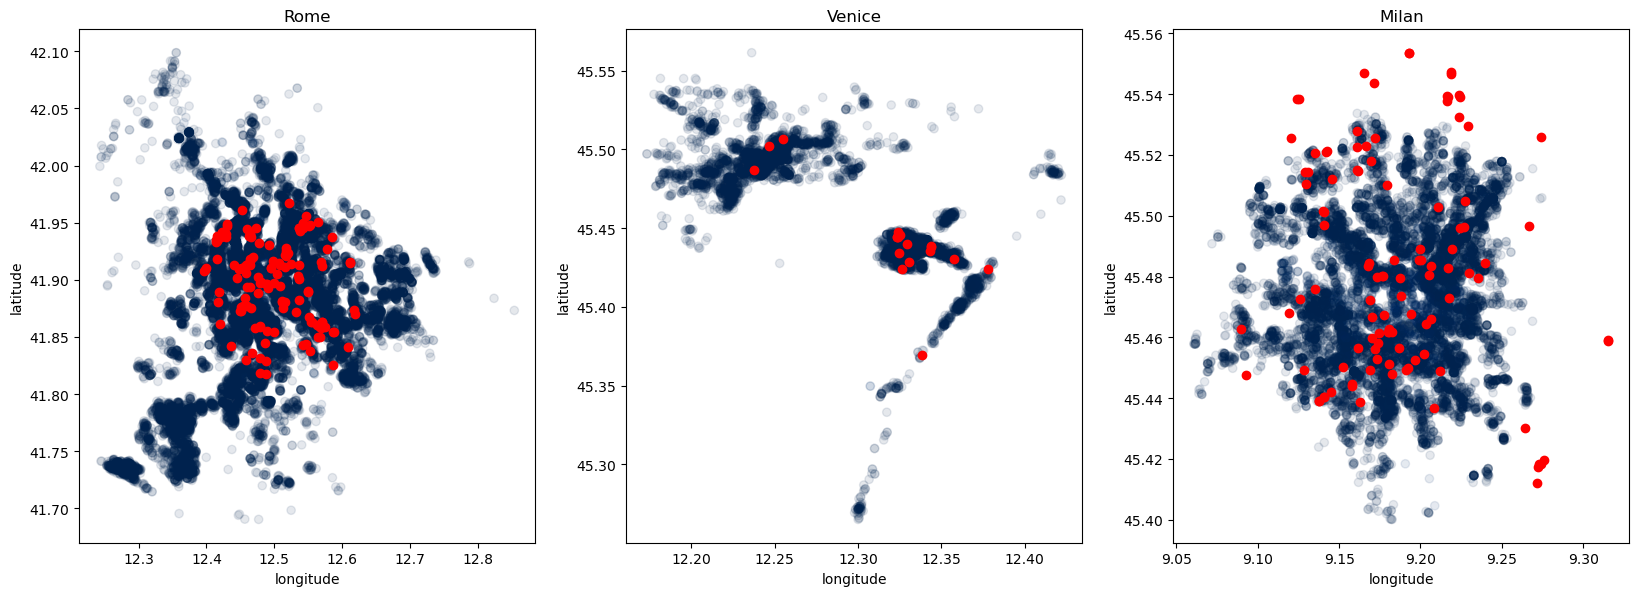

In [1021]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/3))

is_rome = (schools['lon'] > 12.2) & (schools['lon'] < 12.8) & (schools['lat'] > 41.7) & (schools['lat'] < 42.10)
is_venice = (schools['lon'] > 12.1) & (schools['lon'] < 12.40) & (schools['lat'] > 45.0) & (schools['lat'] < 45.60)
is_milan = (schools['lon'] > 8.9) & (schools['lon'] < 10) & (schools['lat'] > 45.40) & (schools['lat'] < 45.60)


rome = train_fullcoord[train_fullcoord.latitude < 43]
axes[0].scatter(x=rome.longitude, y=rome.latitude, c=rome.price, cmap='cividis', alpha=0.1)
axes[0].scatter(x=schools.lon[is_rome.values], y=schools.lat[is_rome.values], c='red')
axes[0].set_title("Rome")
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")

venice = train_fullcoord[(train_fullcoord.latitude > 43) & (train_fullcoord.longitude > 11)]
axes[1].scatter(x=venice.longitude, y=venice.latitude, c=venice.price, cmap='cividis', alpha=0.1)
axes[1].scatter(x=schools.lon[is_venice.values], y=schools.lat[is_venice.values], c='red')
axes[1].set_title("Venice")
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")

milan = train_fullcoord[(train_fullcoord.latitude > 43) & (train_fullcoord.longitude < 11)]
axes[2].scatter(x=milan.longitude, y=milan.latitude, c=milan.price, cmap='cividis', alpha=0.1)
axes[2].scatter(x=schools.lon[is_milan.values], y=schools.lat[is_milan.values], c='red')
axes[2].set_title("Milan")
axes[2].set_xlabel("longitude")
axes[2].set_ylabel("latitude")

plt.show()

### Age of the house

Instead of using the construction year, we can calculate the age of the house by subtracting the construction year from the current year. This feature may be useful as newer houses tend to have a higher price compared to older ones.

In [1022]:
current_year = 2023

In [1023]:
train2_df['age_of_house'] = current_year - train2_df['construction_year']

In [1024]:
test2_df['age_of_house'] = current_year - test2_df['construction_year']

## Model Running - Random Forest

In [1025]:
X, y = train2_df.drop('price', axis = 1), train2_df['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [1026]:
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [1027]:
rf_pred = regr.predict(X_test)

### Cross Validation

In [1028]:
num_folds = 5

model = LinearRegression()

mse_scores = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(train2_df):
    
    X_train_k, y_train_k = train2_df.iloc[train_index, :-1], train2_df.iloc[train_index, -1]
    X_test_k, y_test_k = train2_df.iloc[test_index, :-1], train2_df.iloc[test_index, -1]
    
    model.fit(X_train_k, y_train_k)
    
    y_pred_k = model.predict(X_test_k)
    mse = mean_squared_error(y_test_k, y_pred_k)
    
    mse_scores.append(mse)


avg_mse = sum(mse_scores) / len(mse_scores)

In [1029]:
avg_mse

7.563626066032189e-21

### PCA Implementation

In [1030]:
pca = PCA()
pca.fit(train2_df)

variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(variance_ratios)

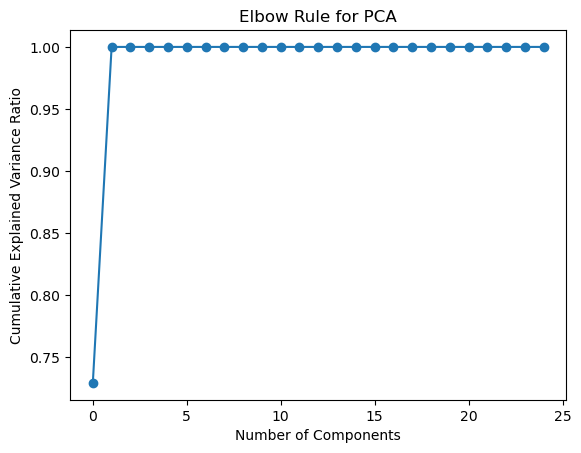

In [1031]:
plt.plot(cumulative_variance_ratios, marker = 'o')
plt.title('Elbow Rule for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

### Hyper Parameters

In [1032]:
rf = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(2, 10),
    'max_features': [1.0, 'sqrt'],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(train2_df.drop(['price'], axis=1), train2_df['price'])

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9ea07952a0>,
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9ea0796bc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9ea07954e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9ea07334c0>},
                   random_state=42)

In [1033]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 64}

In [1034]:
random_search.best_score_

0.38113512290360596

### Mean Squared Error

In [1035]:
mse = mean_squared_error(y_test, rf_pred)

In [1036]:
mse

541255415097.57446

In [1037]:
importances = regr.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.00106148,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72184562, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2770929 , 0.        , 0.        ])

In [1038]:
from sklearn import metrics
XX_test = test2_df

In [1039]:
Y_pred = random_search.best_estimator_.predict(XX_test)
Y_pred

array([188341.73836314, 268402.64361814, 553902.94978017, ...,
       298265.97091332, 213990.66289009, 235490.92808069])

### Final

In [1040]:
output = pd.DataFrame({'id': id_col, 'price': Y_pred})
output

,id,price
0,18825,188341.738363
1,30956,268402.643618
2,47193,553902.949780
3,27799,248332.162815
4,22259,270750.838274
...,...,...
19783,22961,418737.754300
19784,4606,301891.913708
19785,6106,298265.970913
19786,35370,213990.662890


In [1041]:
output.to_csv('output.csv', index = False)